<a href="https://colab.research.google.com/github/asrianda/GIS/blob/main/GIS_A1_Legend_Peta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import geopandas as gpd
from geopandas import GeoDataFrame, read_file
import matplotlib.pyplot as plt
import zipfile
import os

In [19]:
zip='Archive.zip'
with zipfile.ZipFile(zip,'r') as buka:
  #shp=[f for f in buka.namelist() if f.endswith('.shp')]
  shp=[f for f in buka.namelist() if f.endswith('.shp') and
       not '__MACOSX/' in f and not '._' in f]
print(shp)

['ADMINISTRASI_LN_50K.shp', 'ADMINISTRASIKECAMATAN_AR_50K.shp']


In [28]:
gdfs={}
for shp_file in shp:
  #gdf=gpd.read_file(f"zip://{zip}!{shp}")
  gdf=gpd.read_file(f"zip://{zip}!{shp_file}")
  gdfs[shp_file]=gdf
print(gdfs[shp[0]].head())

   KARKTR  ...                                           geometry
0       0  ...  LINESTRING Z (97.04647 5.24146 0, 97.04637 5.2...
1       0  ...  LINESTRING Z (97.14787 5.15211 0, 97.14798 5.1...
2       0  ...  LINESTRING Z (97.13359 5.17511 0, 97.13327 5.1...
3       0  ...  LINESTRING Z (97.11511 5.19866 0, 97.11497 5.1...
4       0  ...  LINESTRING Z (97.07916 5.15859 0, 97.07932 5.1...

[5 rows x 27 columns]


<Axes: >

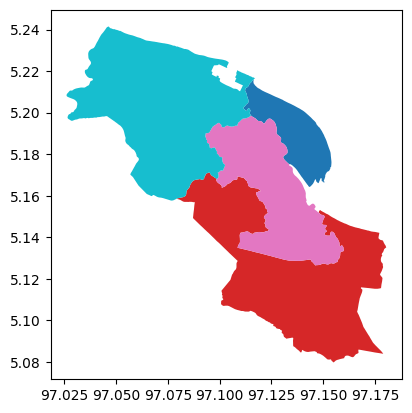

In [34]:
gdfs['ADMINISTRASIKECAMATAN_AR_50K.shp'].plot(column='NAMOBJ')

In [31]:
gdfs['ADMINISTRASIKECAMATAN_AR_50K.shp'].head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,KDEBPS,KDEPUM,KDCBPS,KDCPUM,KDBBPS,KDBPUM,WADMKD,WIADKD,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0, 97.13327 5.175..."
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0, 97.09845 5.167..."
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0, 97.13349 5.175..."
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0, 97.11612 5.215..."


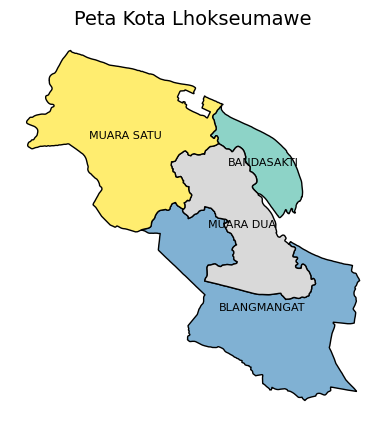

In [59]:
kec=gdfs['ADMINISTRASIKECAMATAN_AR_50K.shp']
#-- Buat Plot --
fig, ax=plt.subplots(figsize=(8,5))
#-- plot kecamatan berdasar shp aoa --
kec.plot(column='NAMOBJ', cmap='Set3', edgecolor='black', ax=ax)
#-- Tambahkan Label name ke tengah Poligon --
for idx,row in kec.iterrows():
  if row['geometry'].geom_type in ['Polygon','MultiPolygon']:
    plt.text(row['geometry'].centroid.x,
             row['geometry'].centroid.y,
             row['NAMOBJ'],
             fontsize=8,ha='center',va='center',
             )
#-- Tambahkan judul peta --
plt.title('Peta Kota Lhokseumawe',fontsize=14)
plt.axis('off')
plt.show()

  #ax.annotate(text=row['NAMOBJ'], xy=row.geometry.centroid.coords[0], ha='center')